# impedance.py で　等価回路の定数を予測　
Library impedance.py 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmath
import math

# File読み込み　
Keysight のCSVファイルを読み込んで　Impedance.py でわかる形に変換

In [2]:
import os
path='素子評価（インピーダンスアナライザ）\バイアス印加0721\測定データ'
filenames=os.listdir(path)
#selected_filenames = [f for f in filenames if "VARI-Z-" in f]
selected_filenames = [f for f in filenames if "TVS-Z-" in f]
print(selected_filenames)

['TVS-Z-20V-R.CSV', 'TVS-Z-20V.CSV', 'TVS-Z-26V-R.CSV', 'TVS-Z-26V.CSV', 'TVS-Z-28.9V-R.CSV', 'TVS-Z-28.9V.CSV', 'TVS-Z-32.0V-R.CSV', 'TVS-Z-32.0V.CSV', 'TVS-Z-R-AFTER.CSV']


In [161]:
#filename='素子評価（インピーダンスアナライザ）\バイアス印加0721\測定データ\VARI-Z.CSV'
#filename='素子評価（インピーダンスアナライザ）\バイアス印加0721\測定データ\TVS-Z.CSV'

filename=path+"\\"+selected_filenames[2]
print(filename)

素子評価（インピーダンスアナライザ）\バイアス印加0721\測定データ\TVS-Z-26V-R.CSV


<Figure size 640x480 with 0 Axes>

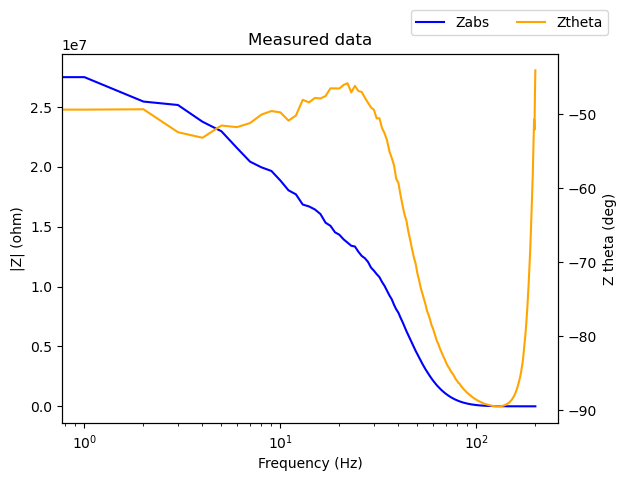

In [256]:
#
with open(filename) as f:
    df = pd.read_csv(filename,skiprows=4)
aZt = df.iloc[:-1]
freq_array = np.array(aZt.iloc[:,0])
Zabs_array = np.array(aZt.iloc[:,1])
Theta_array = np.array(aZt.iloc[:,2])

#-------------------

fig = plt.figure()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (ohm)')
ax2 = ax1.twinx()
ax2.set_ylabel('Z theta (deg)')
ax1.plot(freq_array,Zabs_array,color='blue',label="Zabs")
ax2.plot(freq_array,Theta_array,color='orange',label="Ztheta")
fig.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1,ncol=2)
plt.title('Measured data')
plt.xscale('log')
plt.show()

#-------------------

# |Z|と偏角のデータから、実部・虚部に変換する
Zcomp_array = [cmath.rect(Zabs, theta*math.pi/180.0) for Zabs, theta in zip(Zabs_array, Theta_array)]
Zcomp_array=np.array(Zcomp_array)
from impedance import preprocessing
# 第 1 象限にインピーダンス データのみを保持する
frequencies, Z = preprocessing.ignoreBelowX(freq_array, Zcomp_array)


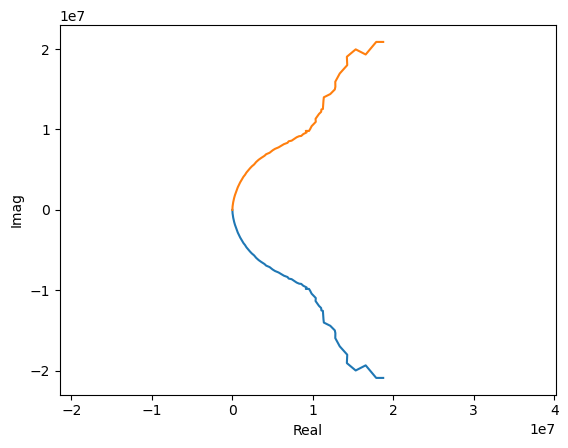

In [257]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')

nyquist(Z)

# 各種モデル　予測
初期値に敏感なので、initial_guessの値は何回か入れなおしして計算するのがよい  
20秒～１分くらい計算する
それぞれで、計算する場合は、わけてやった方がよい 

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist ,plot_bode
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.fitting import rmse

In [349]:
# TVS 用
TVS_customCircuit = CustomCircuit(initial_guess= [4.4E+7, 1.4E-07, 5.e+8, 0.12E-6 ,1.5E-6 ] , circuit='p(R_0,C_0)-p(R_1,C_1)-R_2')
#TVS_customCircuit = CustomCircuit(initial_guess=[None, None,None,None, 1.1E+1], constants= {'R_0':5.E+3,'C_0':4.10E-07, 'R_1':6.e+4,'C_1':4E-6 } , circuit='p(R_0,C_0)-p(R_1,C_1)-R_2')

#TVS_customCircuit = CustomCircuit(initial_guess= [3.05314782e-13, 1.10E+07, 1.e+1, 1.6E-5 ,1.1E-12 ] , circuit='R_0-p(R_1-Wo_1,C_1)')
#TVS_customCircuit = CustomCircuit(initial_guess= [3.05314782e-3, 1.10E+07, 1.e-1, 1.6E-2 ,1.1E-12 ] , circuit='R_0-p(R_1-Ws_1,C_1)')
#TVS_customCircuit = CustomCircuit(initial_guess= [3.05314782e+3, 1.20E+07,1.11E-6,1E-2,1e-3,1.e+3, 16E-4 ] , circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')
#TVS_customCircuit = CustomCircuit(initial_guess= [1.05314782e-13, 1.20E+07,1.11E-6,1E-2, 16E-4 ] , circuit='R_0-p(R_1,C_1)-Wo_1')
#TVS_customCircuit = Randles(initial_guess=[.01, .005, .001, 200, .1, .9], CPE=True)
TVS_customCircuit.fit(frequencies, Z)
TVS_customCircuit_fit = TVS_customCircuit.predict(frequencies)
TVS_rmse = rmse(Z, TVS_customCircuit_fit)
TVS_customCircuit.plot(f_data=frequencies, Z_data=Z)


c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [351]:
# TVS 用
TVS_customCircuit = CustomCircuit(initial_guess= TVS_customCircuit.parameters_ , circuit='p(R_0,C_0)-p(R_1,C_1)-R_2')
#TVS_customCircuit = CustomCircuit(initial_guess= TVS_customCircuit.parameters_ , circuit='R_0-p(R_1-Wo_1,C_1)')
#TVS_customCircuit = CustomCircuit(initial_guess= TVS_customCircuit.parameters_ , circuit='R_0-p(R_1-Ws_1,C_1)')
#TVS_customCircuit = Randles(initial_guess=TVS_customCircuit.parameters_, CPE=True)
#TVS_customCircuit = CustomCircuit(initial_guess= TVS_customCircuit.parameters_ , circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')
#TVS_customCircuit = CustomCircuit(initial_guess= TVS_customCircuit.parameters_ , circuit='R_0-p(R_1,C_1)-Wo_1')
TVS_customCircuit.fit(frequencies, Z)
TVS_customCircuit_fit = TVS_customCircuit.predict(frequencies)
TVS_rmse = rmse(Z, TVS_customCircuit_fit)
TVS_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [292]:
print(TVS_customCircuit.parameters_)

[7.81178616e+03 2.80130529e-10 3.02889981e+04 5.24630695e-10
 4.13994519e+03]


c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))


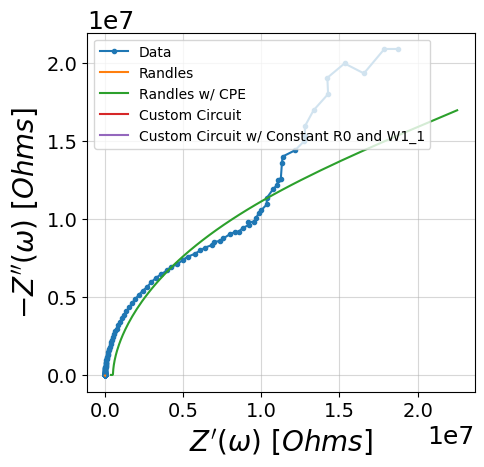


Name: Randles
Circuit string: R0-p(R1-Wo1,C1)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 5.00e-03 [Ohm]
  Wo1_0 = 1.00e-03 [Ohm]
  Wo1_1 = 2.00e+02 [sec]
     C1 = 1.00e-01 [F]

Fit parameters:
     R0 = 4.40e+03  (+/- 5.73e+05) [Ohm]
     R1 = 1.76e+03  (+/- 7.68e+05) [Ohm]
  Wo1_0 = 1.61e+01  (+/- 6.67e+02) [Ohm]
  Wo1_1 = 1.68e+02  (+/- 6.07e+01) [sec]
     C1 = 2.12e-10  (+/- 7.83e-06) [F]


Name: Randles w/ CPE
Circuit string: R0-p(R1-Wo1,CPE1)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 5.00e-03 [Ohm]
  Wo1_0 = 1.00e-03 [Ohm]
  Wo1_1 = 2.00e+02 [sec]
  CPE1_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 2.65e+05  (+/- 1.22e-10) [Ohm]
     R1 = 2.37e+05  (+/- 5.54e-11) [Ohm]
  Wo1_0 = 1.17e+05  (+/- 8.55e-11) [Ohm]
  Wo1_1 = 6.11e-06  (+/- 2.83e-07) [sec]
  CPE1_0 = 7.15e-09  (+/- 2.06e-09) [Ohm^-1 sec^a]
  CPE1_1 = 3.11e-01  (+/- 1.96e-02) []


Circuit string: R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1
Fit: True

Initial 

In [170]:
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist
from impedance.models.circuits import Randles, CustomCircuit

randles = Randles(initial_guess=[.01, .005, .001, 200, .1])
randlesCPE = Randles(initial_guess=[.01, .005, .001, 200, .1, .9], CPE=True)
customCircuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200],
                              circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')
customConstantCircuit = CustomCircuit(initial_guess=[None, .005, .1, .005, .1, .001, None],
                                      constants={'R_0': 0.02, 'Wo_1_1': 200},
                                      circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')
randles.fit(frequencies, Z)
randlesCPE.fit(frequencies, Z)
customCircuit.fit(frequencies, Z)
customConstantCircuit.fit(frequencies, Z)

randles_fit = randles.predict(frequencies)
randlesCPE_fit = randlesCPE.predict(frequencies)
customCircuit_fit = customCircuit.predict(frequencies)
customConstantCircuit_fit = customConstantCircuit.predict(frequencies)

fig, ax = plt.subplots(figsize=(5,5))

plot_nyquist(Z, ax=ax)
plot_nyquist(randles_fit, fmt='-', ax=ax)
plot_nyquist(randlesCPE_fit, fmt='-', ax=ax)
plot_nyquist(customCircuit_fit, fmt='-', ax=ax)
plot_nyquist(customConstantCircuit_fit, fmt='-', ax=ax)

ax.legend(['Data', 'Randles', 'Randles w/ CPE', 'Custom Circuit', 'Custom Circuit w/ Constant R0 and W1_1'])
plt.show()
print(randles)
print(randlesCPE)
print(customCircuit)
print(customConstantCircuit)

In [23]:
randlesCPE = Randles(initial_guess=randlesCPE.parameters_, CPE=True)
randlesCPE.fit(frequencies, Z)
randlesCPE_fit = randlesCPE.predict(frequencies)

In [24]:
randlesCPE.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

# ここから　各種モデルあてはめ

In [9]:
# 抵抗モデル
R1_customCircuit = CustomCircuit(initial_guess= [6E+8, 3E-04,2e-03] , circuit=' p(R0-L0,C0)')
R1_customCircuit.fit(frequencies, Z)
R1_customCircuit_fit = R1_customCircuit.predict(frequencies)
R1_rmse = rmse(Z, R1_customCircuit_fit)
R1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [196]:
print(R1_customCircuit)
print(R1_rmse)
# 予測された値を、上のInithal Guessに当てはめてみると　精度がよくなる場合が多い


Circuit string: p(R0-L0,C0)
Fit: True

Initial guesses:
     R0 = 6.00e+08 [Ohm]
     L0 = 3.00e-09 [H]
     C0 = 2.00e-06 [F]

Fit parameters:
     R0 = 4.50e+08  (+/- 1.91e-28) [Ohm]
     L0 = 3.00e-09  (+/- 1.33e-24) [H]
     C0 = 3.41e-10  (+/- 3.99e-09) [F]

22601188.241203453


In [237]:
# 抵抗モデル 初期値を更新して再計算する
R1_customCircuit = CustomCircuit(initial_guess=R1_customCircuit.parameters_ , circuit=' p(R0-L0,C0)')
R1_customCircuit.fit(frequencies, Z,global_opt=True)
R1_customCircuit_fit = R1_customCircuit.predict(frequencies)
R1_rmse = rmse(Z, R1_customCircuit_fit)
R1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\impedance\models\circuits\fitting.py:213: UserWarning: Failed to compute perror
  warnings.warn('Failed to compute perror')
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [258]:
# キャパシタモデル
C1_customCircuit = CustomCircuit(initial_guess=[1E-5, 1E-10,1,8E10,1], circuit='p(C1,C0-R0)-R1-L0')
C1_customCircuit.fit(frequencies, Z)
C1_customCircuit_fit = C1_customCircuit.predict(frequencies)
C1_rmse = rmse(Z, C1_customCircuit_fit)
C1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [243]:
# キャパシタモデル　初期値を更新して再計算する
C1_customCircuit = CustomCircuit(initial_guess=C1_customCircuit.parameters_, circuit='p(C1,C0-R0)-R1-L0')
C1_customCircuit.fit(frequencies, Z)
C1_customCircuit_fit = C1_customCircuit.predict(frequencies)
C1_rmse = rmse(Z, C1_customCircuit_fit)
C1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [168]:
print(C1_customCircuit)
print(C1_rmse)


Circuit string: p(C1,C0-R0)-R1-L0
Fit: True

Initial guesses:
     C1 = 3.84e-09 [F]
     C0 = 3.98e-09 [F]
     R0 = 2.54e+00 [Ohm]
     R1 = 3.61e+01 [Ohm]
     L0 = 1.25e-01 [H]

Fit parameters:
     C1 = 1.04e-10  (+/- 1.76e-04) [F]
     C0 = 1.06e-10  (+/- 1.76e-04) [F]
     R0 = 3.22e+01  (+/- 1.48e-13) [Ohm]
     R1 = 1.40e+02  (+/- 2.69e-12) [Ohm]
     L0 = 3.12e-02  (+/- 2.59e-03) [H]

7145199.239234646


In [259]:
# インダクタモデル
L1_customCircuit = CustomCircuit(initial_guess=[1E8, 1E-9,1E-3,1E-3], circuit='p(R1,R0-L0,C0)')
L1_customCircuit.fit(frequencies, Z)
L1_customCircuit_fit = L1_customCircuit.predict(frequencies)
L1_rmse = rmse(Z, L1_customCircuit_fit)
L1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [261]:
# インダクタモデル　初期値を更新して再計算する
L1_customCircuit = CustomCircuit(initial_guess=L1_customCircuit.parameters_, circuit='p(R1,R0-L0,C0)')
L1_customCircuit.fit(frequencies, Z)
L1_customCircuit_fit = L1_customCircuit.predict(frequencies)
L1_rmse = rmse(Z, L1_customCircuit_fit)
L1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [171]:
print(L1_customCircuit)
print(L1_rmse)


Circuit string: p(R1,R0-L0,C0)
Fit: True

Initial guesses:
     R1 = 1.22e+04 [Ohm]
     R0 = 1.22e+04 [Ohm]
     L0 = 2.50e+04 [H]
     C0 = 1.62e-09 [F]

Fit parameters:
     R1 = 1.22e+04  (+/- 7.22e+05) [Ohm]
     R0 = 1.22e+04  (+/- 1.14e-16) [Ohm]
     L0 = 2.50e+04  (+/- 2.31e+01) [H]
     C0 = 1.62e-09  (+/- 1.50e-06) [F]

7575011.045971707


In [229]:
# D1モデル
D1_customCircuit = CustomCircuit(initial_guess=[7.82e+10, 8.58e+03,2.51e-10], circuit='R0-p(R1,C0)')
D1_customCircuit.fit(frequencies, Z)
D1_customCircuit_fit = D1_customCircuit.predict(frequencies)
D1_rmse = rmse(Z, D1_customCircuit_fit)
D1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [230]:
# D1モデル　初期値を更新して再計算する
D1_customCircuit = CustomCircuit(initial_guess=D1_customCircuit.parameters_, circuit='R0-p(R1,C0)')
D1_customCircuit.fit(frequencies, Z)
D1_customCircuit_fit = D1_customCircuit.predict(frequencies)
D1_rmse = rmse(Z, D1_customCircuit_fit)
D1_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [174]:
print(D1_customCircuit)
print(D1_rmse)


Circuit string: R0-p(R1,C0)
Fit: True

Initial guesses:
     R0 = 7.82e+01 [Ohm]
     R1 = 8.58e+03 [Ohm]
     C0 = 2.51e-10 [F]

Fit parameters:
     R0 = 7.82e+01  (+/- 5.12e+05) [Ohm]
     R1 = 8.58e+03  (+/- 8.00e+05) [Ohm]
     C0 = 2.51e-10  (+/- 1.71e-06) [F]

7576207.609537334


In [231]:
# D2モデル
D2_customCircuit = CustomCircuit(initial_guess=[6.67e+10,8.93e-05 ,4.57e-07], circuit='p(R0-C0,C1)')
D2_customCircuit.fit(frequencies, Z)
D2_customCircuit_fit = D2_customCircuit.predict(frequencies)
D2_rmse = rmse(Z, D2_customCircuit_fit)
D2_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [232]:
# D2モデル　初期値を更新して再計算
D2_customCircuit = CustomCircuit(initial_guess=D2_customCircuit.parameters_, circuit='p(R0-C0,C1)')
D2_customCircuit.fit(frequencies, Z)
D2_customCircuit_fit = D2_customCircuit.predict(frequencies)
D2_rmse = rmse(Z, D2_customCircuit_fit)
D2_customCircuit.plot(f_data=frequencies, Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [177]:
print(D2_customCircuit)
print(D2_rmse)


Circuit string: p(R0-C0,C1)
Fit: True

Initial guesses:
     R0 = 6.67e+01 [Ohm]
     C0 = 8.93e-05 [F]
     C1 = 1.45e-06 [F]

Fit parameters:
     R0 = 6.67e+01  (+/- 7.83e+05) [Ohm]
     C0 = 8.93e-05  (+/- 2.12e+00) [F]
     C1 = 1.45e-06  (+/- 4.74e-02) [F]

7578722.881874103


# 初期値の一部を固定した計算の例

In [178]:
initial_guess_=[None, .005, .1, .005, .1]
constants_={'R0': 0.02}
circuit_='R0-p(R1,C1)-p(R2,C2)'

X1_customCircuit = CustomCircuit(initial_guess=initial_guess_,
                                      constants=constants_,
                                      circuit=circuit_)
X1_customCircuit.fit(frequencies, Z)
X1_customCircuit_fit = X1_customCircuit.predict(frequencies)
X1_rmse = rmse(Z, X1_customCircuit_fit)
print(X1_customCircuit)
print(X1_rmse)


Circuit string: R0-p(R1,C1)-p(R2,C2)
Fit: True

Constants:
     R0 = 2.00e-02 [Ohm]

Initial guesses:
     R1 = 5.00e-03 [Ohm]
     C1 = 1.00e-01 [F]
     R2 = 5.00e-03 [Ohm]
     C2 = 1.00e-01 [F]

Fit parameters:
     R1 = 1.62e+00  (+/- 4.40e+05) [Ohm]
     C1 = 1.65e-04  (+/- 1.09e+02) [F]
     R2 = 1.62e+00  (+/- 4.40e+05) [Ohm]
     C2 = 1.65e-04  (+/- 1.09e+02) [F]

7578754.542221138


In [179]:
X1_customCircuit.plot(f_data=frequencies,Z_data=Z)

c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

# 各種　等価回路モデル  
## 抵抗  
* ![抵抗](EquivalentCircuit\Resistor.jpg)  
 * Impedance.py 表記 
  - p(R0-L0,C0)
 * ラプラス式　表記
  - $ \frac{1}{C_{0} s + \frac{1}{L_{0} s + R_{0}}} $
  - Z=1/((1/(R1+s*L1))+(s*C1))
## キャパシタ  
* ![キャパシタ](EquivalentCircuit\Capacitor2.jpg)   
 * Impedance.py 表記 
  - p(C1,C0-R0)-R1-L0  
 * ラプラス式　表記
  - $ L_{0} s + R_{1} + \frac{1}{C_{0} s + \frac{1}{R_{0} + \frac{1}{C_{1} s}}} $
  - Z = 1/(s*C0+1/(1/(s*C1)+R0))+R1+s*L0　　
　　
　　
## インダクタ  
* ![インダクタ](EquivalentCircuit\Inductor2.jpg)  
 * Impedance.py 表記 
  - p(R1,R0-L0,C0)    
 * ラプラス式　表記
  - $ \frac{1}{C_{0} s + \frac{1}{L_{0} s + R_{0}} + \frac{1}{R_{1}}} $
  - Z = 1/1/(1/R1+1/(R0+s*L0)+s*C0)
  
## D1  
* ![D1](EquivalentCircuit\Diode1.jpg)  　
 * Impedance.py 表記　
  - R0-p(R1,C0)
 * ラプラス式　表記
  - $ R_{0} + \frac{1}{C_{0} s + \frac{1}{R_{1}}} $
  - Z = R0+ 1/(s*C0+1/R1)

## D2  
* ![D2](EquivalentCircuit\Diode2.jpg)  
 * Impedance.py 表記　
  - p(R0-C0,C1)
 * ラプラス式　表記
  - $ \frac{1}{C_{1} s + \frac{1}{C_{0} s + \frac{1}{R_{0}}}} $
  - Z= 1/(1/(1/R0+s*C0)+s*C1)
